<div class="alert alert-block alert-warning">

# <p style="text-align: center;">Lab 3 (Weeks 5,6): Multi-Layer Perceptrons (MLP) </p>

<img src="https://viso.ai/wp-content/uploads/2021/04/multilayer-perceptrons-MLP-concept-1.jpg" width="400" height="200" />

<!-- ![linear-vs-logistic-regression--medium](https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg) -->

Welcome to your third lab of ECE4179! Labs in this unit will run as a help desk and they are not mandatory to attend. As a reminder, this lab can be completed in pairs but you and your partner need to register via the google forms on Moodle under week 5.

The two notebooks provided contain all the code and comments that you need to submit. Feel free to add in your own markdown for additional comments. After completion, You need to submit both Jupyter Notebooks (.ipynb file) to Moodle. Make sure you run the Notebooks before submitting and all outputs are visible.

In this Lab, you will find three tasks distributed across two notebooks: Sinusoidal and CoverType. These tasks will guide you through to learn using a deep learning framework (Pytorch lightning) for MLP based problems. These knowledge and skills will be essential for lab 4 and assignment, and in general, critical to get you prepared to enter the deep learning world.

- <b>Task 1:</b> Shallow MLP to fit MLP into a sinusoidal function
- <b>Task 2:</b> Shallow MLP for multiclass classification of the Covertype dataset
- <b>Task 3:</b> Deep MLP for multiclass classification of the Covertype dataset

Each task will contain code to complete, and worded questions, so ensure you complete both before submitting.

Good luck with the Lab!

__Submission details:__
- __Make sure you have run all your cells from top to bottom (you can click _Kernel_ and _Restart Kernel and Run All Cells_).__ </br>
- __Submit the Jupyter Notebooks (Lab3\_1\_Sinusoidal.ipynb) and (Lab3\_2\_FashionMNIST.ipynb).__
- __Outputs must be visible upon submission. We will also be re-running your code__

<b>Enter your student details below</b>

- <b>Student Name:</b> Lucas Liu
- <b>Student ID:</b> 31445179

If you have a partner:
- <b>Second Student Name:</b> Firstname Lastname
- <b>Second Student ID:</b> 123456789

<div class="alert alert-block alert-danger">

## Table of Contents

* [Task 2 - Shallow MLP for CoverType dataset](#task2)
    * [2.1 Loading data points and Create Tensor Dataset](#2_1)
    * [2.2 Design Shallow MLP](#2_2)
    * [2.3 Train and evaluate model's performance](#2_3)
    * [2.3 Train and evaluate model's performance](#2_4)
* [Task 3 Deep MLP](#task3)
    * [3.1 Design Deep MLP](#3_1)
    * [3.2 Train and evaluate model's performance](#3_2)
    * [3.3 Visualise the results for the network.](#3_3)

<div class="alert alert-block alert-warning">

# Before you begin

We have provided some numerical answers for you to aim for. To replicate these results, do not change any of the codes that are labelled "Do not change".

Throughout this lab, there will be code and written answers that you need to fill in / complete. Please read the instructions carefully. The comments in the code snippet and markdown text will guide you on what you need to do.


In [67]:
# If you have not installed pytorch-lightning already, then please follow the instructions below

# # If you run on Jupyter Lab uncomment below comment
# ! pip install --quiet "matplotlib" "pytorch-lightning" "pandas" "torchmetrics" "torchvision"

# # If you run on google colab uncomment below comment
# ! pip install pytorch-lightning -qq

In [68]:
## Libraries, you do not need to import any additional libraries for this lab

import numpy as np  ## Numpy is the fundamental building block of understanding tensor (matrices) within Python
import matplotlib.pyplot as plt  ## Matplotlib.pyplot is the graphing library that we will be using throughout the semester
import random  ## Useful for sampling

# import sys ## Useful to retrieve some system information

import os  ## Useful for running command line within python
import pandas as pd  ## Useful for data manipulation
from IPython.display import Image  ## For markdown purposes
from IPython.display import clear_output
import PIL

import torch  ## Pytorch is the deep learning library that we will be using
import torch.nn as nn  ## Neural network module
import torch.nn.functional as F  ## Functional module
from torch import optim  ## Optimizer module
from torch.utils.data import (
    DataLoader,
    random_split,
)  ## Under torchvision datasets you can find popular datasets that are frequently used for machine learning/deep learning tasks (eg., MNIST, SVHN, CIFAR10, CIFAR100 etc).
from torchmetrics import (
    Accuracy,
)  ## Torchmetrics is a library that contains metrics for evaluating models
from torchmetrics.classification import MulticlassAccuracy
import torchvision  ## Torchvision is a library that contains popular datasets, model architectures, and image transformations for computer vision tasks
from torchvision import transforms

import pytorch_lightning as pl  ## Pytorch lightning is a wrapper for pytorch that makes it easier to train models
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import Callback, ModelCheckpoint
from pytorch_lightning.callbacks.progress import TQDMProgressBar


from pytorch_lightning import seed_everything

## Setting seeds for reproducibility. Do NOT change these!
seed_everything(4179)
random.seed(4179)
np.random.seed(4179)

Seed set to 4179


In [69]:
## This code snippet does not need to be edited

# from python_environment_check import check_packages
# from python_environment_check import set_background

# ## Colour schemes for setting background colour
# white_bgd = 'rgba(0,0,0,0)'
# red_bgd = 'rgba(255,0,0,0.2)'

<div class="alert alert-block alert-info">

# Task 2 & 3 : Compare Shallow MLP and Deep MLP

In sections 2 and 3 you will be training a Shallow MLPs and Deep MLPs for classifying a CoverType dataset which is collected from 7 types of forest covers. 54 features are captured in each sample of the dataset. Then we will train a Shallow (Section 2) and Deep (Section 3) MLP for classifying this dataset that contains input features and labels (The input features are 1x54 and class labels are from 1-7).

<img src="figures/shallow_deep_mlp.png" width="1200" align="center">
    
In the above figure A is a shallow neural network and B is a deep neural network.

#### Details of Covertype dataset:

- This dataset is available form UCI Machine Learning Repository, you should use [```fetch_openml()```](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) function to load the data (Note: version 3 of data must be loaded)

- The dataset consists of 54 input features, some of the entries are shown as below:

| **Feature**                | **Variable Type**     | **Description**                                                      |
|----------------------------|-------------------|----------------------------------------------------------------------|
| Elevation                          | Numerical   | Measured in meters                                                                    |
| Aspect                             | Numerical   | Aspect in degrees azimuth                                                    |
| Slope                              | Numerical   | Measured in degrees                                                                         |
| Horizontal_Distance_To_Hydrology   | Numerical   | Horizontal distance to the nearest surface water features (in mters)
| Vertical_Distance_To_Hydrology     | Numerical   | Vertical distance to the nearest surface water features (in meters)                                               |
| Horizontal_Distance_To_Roadways    | Numerical   | Horizontal distance to the nearest roadway (in meters)                                       |
| Hillshade_9am                      | Numerical   | Hillshade index at 9am, which measures the shadow and sunlight exposure on the landscape (0 to 255)             |
| Hillshade_Noon                     | Numerical   | Hillshade index at Noon                                                                       |
| Hillshade_3pm                      | Numerical   | Hillshade index at 3pm                                                                                     |
| Horizontal_Distance_To_Fire_Points | Numerical   | Horizontal distance to the nearest wildfire ignition points (in meters)                                |
| Wilderness_Area                    | Categorical | One-hot encoded as 4 binary columns representing the wilderness area designation (Rawah, Neota, Comanche Peak, Cache la Poudre) |
| Soil_Type                          | Categorical | One-hot encoded as 40 binary columns representing different soil types according to US Forest Service classification   |


- The target variable in the Covertype dataset represents the forest cover type, and there are 7 distinct classes:

| **Cover Type**          | **Code** |
|-------------------------|----------|
| Spruce/Fir              | 1        |
| Lodgepole Pine          | 2        |
| Ponderosa Pine          | 3        |
| Cottonwood/Willow       | 4        |
| Aspen                   | 5        |
| Douglas-fir             | 6        |
| Krummholz               | 7        |

    
#### Modules that you will need in this task:
- sklearn's datasets and preprocessing modules to load the dataset and apply proper transforms
- sklearn's model_selection module to split the dataset into train(60%), test(20%), and validation(20%)
- torch TensorDataset and DataLoader to create the train, test, and validation datasets and data loaders
- pytorch_lightning module class to construct a MLP in order to perform training and testing on the given datasets.


<div class="alert alert-block alert-info">

# Task 2 - Shallow MLP for CoverType dataset <a class="anchor" id="task2"></a>

For this task you will work on the following points:
 1. Create training, validation and testing dataloaders.
 2. investigate the training datasets (in terms of shape of the data).
 3. Design shallow neural network model.
 4. Perform training the model and evaluation for different settings. Report test accuracies.
 5. Visualize experimental results for training losses.
 6. Visualize experimental results for validation accuracies.
 7. Visualize predictions.
 8. Optimize Shallow network's performance.

    
Note:  In all the parts below, you should only use the training data and their labels to train your model. You may use the **validation set** to pick a trained model. For example, during training, you can test the accuracy of your model using the validation set every epoch and pick the model that achieves the highest validation accuracy. You should then report your results on the test set once you choose your model.

<div class="alert alert-block alert-info">

## Learning Objective

This task aims to understand and implement a Deep MLP model to train neural networks on the CoverType dataset. By the end of this task, you will be able to:

1. Load the dataset from sci-kit learn package, and prepare the dataset and dataloader on the CoverType dataset.

2. Implement a Multi-Layer Perceptron (MLP) model using PyTorch Lightning's framework.

3. Apply stochastic gradient descent (SGD) optimization method to train the MLP model on the CoverType dataset.

4. Visualize and analyze the performance of the MLP model on the given samples to understand how well it fits the data.

<div class="alert alert-block alert-info">

## 2.1 Loading data points and Create Tensor Dataset <a class="anchor" id="2_1"></a>

Let's load the dataset and inspect the data.

The code rovided in the following cell includes:
- The implementation of `fetch_openml` to fetch the Covertype dataset from the OpenML repository. It ensures that the data is numeric and encodes the target labels as integers.
- The implementation of the `fit_transform` method in the `LabelEncoder` to encode target labels with values between 0 and the number of classes minus 1.
- The `unique` function is also included, which returns unique values of the targets after encoding.

In [70]:
#### DO NOT CHANGE THIS SECTION ####
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

# Fetch the Covertype dataset
covertype = fetch_openml(name="Covertype", version=3)

# Ensure all data is numeric
X = covertype.data.astype(np.float32)

# Encode the target labels as integers
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(covertype.target)
unique_labels = np.unique(Y)
print("Classes:", np.unique(Y))
#### DO NOT CHANGE THIS SECTION ####

KeyboardInterrupt: 

#### (a) Inspect the data

Now you have input features in 'X' and the corresponding labels in 'Y'. Inspect the data by doing the following:

- Print out the number of features 
- Print out the number of samples
- Print out the shape of Y
- Print the first 3 samples of input features 'X' and their corresponding labels in 'Y'


In [ ]:
# Print the shape of the input data. You should be able to infer the number of samples and features from the shape
print(X.shape)
# Print the shape of the target label
print(Y.shape)  # type: ignore

# Print the first samples of the input features and their labels
print(X.to_numpy()[0, :])
print(Y[0])

(581012, 54)
(581012,)
[0.368684 0.141667 0.045455 0.184681 0.223514 0.071659 0.870079 0.913386
 0.582677 0.875366 1.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       1.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.      ]
4


#### (b) Split the dataset

Different from Task 1, to train a network for classification, a key process is to split the dataset into train, validatio and test sets.

Let's split the data into 60% train, 20% validation, and 20% test.

- You will need to use [```train_test_split```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function 
- Make sure after splitting the number of samples per class is balanced among all classes. You can achive it by using the 'startify' option in the 'train_test_split' function
- Print out the shape of input features and labels for splitted data.
- Remember that you need to this for both the features (X) and labels (Y).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.4)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_test, Y_test, stratify=Y_test, test_size=0.5
)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)
print(type(X_train), type(Y_train))

(348607, 54) (348607,)
(116202, 54) (116202,)
(116203, 54) (116203,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


#### (c) Preprocessing of input features:

Note that the PyTorch network only recognise tensors to be passed in. If you check the ```type()``` of the data imported so far, you will find out that they are not tensors yet. And there are also some common preprocess as well.

For this task, we need to:
1. Scaling the Numerical Features: It's often a good idea to *scale* or *normalize* the numerical features so that they have similar ranges. This can help the model converge faster and avoid issues related to features with different scales.
    - You can use [```StandardScaler```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from sklearn.preprocessing to scale the input features in train, test, and val data
    - Then check the datatype of the transformed variables
2. Convert the data from numpy array into torch tensors:
   1. Convert input features into 32-bit floating-point tensors.
   2. Convert labels into 64-bit integer tensors.
   3. You can check if the convertion is done correctly by use ```dtype``` to check the variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
print(type(X_train), type(Y_train))
print(type(X_val), type(Y_val))
print(type(X_test), type(Y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Convert the data to torch tensors
X_train_tensor = torch.tensor(X_train)
Y_train_tensor = torch.tensor(Y_train)

X_val_tensor = torch.tensor(X_val)
Y_val_tensor = torch.tensor(Y_val)

X_test_tensor = torch.tensor(X_test)
Y_test_tensor = torch.tensor(Y_test)

print(X_train_tensor.dtype, Y_train_tensor.dtype)
print(X_val_tensor.dtype, Y_val_tensor.dtype)
print(X_test_tensor.dtype, Y_test_tensor.dtype)

torch.float32 torch.int64
torch.float32 torch.int64
torch.float32 torch.int64


#### (d) Create the datasets and dataloader

**Create the dataset**

Now we have the tensors, let's create three datasets for train, validation, and test. It is a similar process to Task 1 but with a different torch module ```TensorDataset``` from ```torch.utils.data```. You can check out the shape of Dataset.tensors[0] (input feature tensor) and Dataset.tensors[1] (target tensor) when you create Dataset from train, test, and validation tensors to make sure the dataset is created correctly.

In [ ]:
from torch.utils.data.dataset import TensorDataset

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)

print(train_dataset.tensors[0].shape, train_dataset.tensors[1].shape)
print(val_dataset.tensors[0].shape, val_dataset.tensors[1].shape)
print(test_dataset.tensors[0].shape, test_dataset.tensors[1].shape)

torch.Size([348607, 54]) torch.Size([348607])
torch.Size([116202, 54]) torch.Size([116202])
torch.Size([116203, 54]) torch.Size([116203])


**Create the dataloader**

You can create the dataloader in the same as Task 1, with the batch size of 256.

In [ ]:
batch_size = 256

train_loader = DataLoader(train_dataset, batch_size=batch_size)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

<div class="alert alert-block alert-info">

## 2.2 Design Shallow MLP <a class="anchor" id="2_2"></a>

Design a Shallow MLP. This will be similar to in task 1. 
 - You need to instantiate Shallow_MLP class from LightningModule
 - Shallow_MLP must take these inputs:
   1. the number of input features
   2. the number of classes
   3. the number of nodes in hidden layer
   4. the learning_rate
   5. the train loader
   6. the test loader 
   7. the validation loader
  
 - In the Shallow_MLP class you should define metrics to evaluate model performance:
   1. train_accuracy
   2. test_accuracy
   3. val_accuracy
   - To define these metrics you should use [```Accuracy()```](https://lightning.ai/docs/torchmetrics/stable/classification/accuracy.html ) class from pytorch-lightning. Make sure you choose the correct type of evaluation - multiclass.

 - Shallow_MLP must have two Linear layer: Linear(# input features $\times$ # hidden nodes) $\rightarrow$ ReLU $\rightarrow$ Linear( # hidden nodes $\times$  # classes)
   1. The first Linear layer (input layer) is followed by a **Relu** activation function.
   2. The second Linear layer (hidden layer) maps the hidden nodes into class scores (logits)

- In this task, use the  [```CrossEntropyLoss```](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

In [ ]:
class Shallow_MLP(LightningModule):
    def __init__(
        self,
        input_features,
        hidden_node,
        classes,
        train_loader,
        test_loader,
        val_loader,
        learning_rate=1e-1,
    ):
        super().__init__()
        self.save_hyperparameters()

        self.learning_rate = learning_rate
        self.loss_fun = nn.CrossEntropyLoss()

        self.linear1 = nn.Linear(input_features, hidden_node)
        self.linear2 = nn.Linear(hidden_node, classes)

        self.train_accuracy = MulticlassAccuracy(classes)
        self.val_accuracy = MulticlassAccuracy(classes)
        self.test_accuracy = MulticlassAccuracy(classes)

    def forward(self, x):
        # Pass input through conv layers
        # Don't forget the activation function

        out1 = nn.functional.relu(self.linear1(x.view(x.size(0), -1)))
        out2 = self.linear2(out1)

        return out2

    def training_step(self, batch, batch_idx):

        # This should be similar to Task 1

        # get the x and y values of the data point
        # pass through the network
        # Get the loss
        x, y = batch
        logits = self(x.view(x.size(0), -1))
        loss = self.loss_fun(logits, y)

        preds = logits.argmax(1)
        self.train_accuracy.update(preds, y)

        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log(
            "train_acc",
            self.train_accuracy,
            prog_bar=True,
            on_step=False,
            on_epoch=True,
        )

        return loss

    def validation_step(self, batch, batch_idx):
        # get the x and y values of the data point
        # pass through the network
        # Get the loss
        x, y = batch
        logits = self(x.view(x.size(0), -1))
        loss = self.loss_fun(logits, y)

        preds = logits.argmax(1)
        self.val_accuracy.update(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log(
            "val_acc", self.val_accuracy, prog_bar=True, on_step=False, on_epoch=True
        )

    def test_step(self, batch, batch_idx):
        # get the x and y values of the data point
        # pass through the network
        # Get the loss
        x, y = batch
        logits = self(x.view(x.size(0), -1))
        loss = self.loss_fun(logits, y)

        preds = logits.argmax(1)
        self.test_accuracy.update(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.test_accuracy, prog_bar=True)

    def predict_step(self, batch, batch_idx):
        # get the x and y values of the data point
        # pass through the network
        x, y = batch
        logits = self(x.view(x.size(0), -1))
        pred = logits.argmax(1)
        return (pred, y, x)

    def configure_optimizers(self):
        # define the SGD optimizer
        optimizer = optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

    ####################
    # DATA RELATED HOOKS
    ####################

    def train_dataloader(self):
        return train_loader

    def val_dataloader(self):
        return val_loader

    def test_dataloader(self):
        return test_loader

<div class="alert alert-block alert-info">

## 2.3 Train and evaluate model's performance <a class="anchor" id="2_3"></a>

Let's train the model with three different scenarios for **30 epochs**

a. model_shallow_a : # hidden nodes = 8

b. model_shallow_b : # hidden nodes = 128

c. model_shallow_c : # hidden nodes = 1024

In all the parts above, you should only use the training input and their labels to train your model. You may use the validation set to pick a trained model.

For example, during training, you can test the accuracy of your model using the validation set every epoch and pick the model that achieves the highest validation accuracy. You should then report your results on the test set once you choose your model. More details can be found in the documentation of [```ModelCheckpoint```](https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.callbacks.ModelCheckpoint.html).

Note: Make sure to have different log file directories and checkpoint folders (eg: logs_task_2a, logs_task_2b and logs_task_2c)

In [ ]:
# define the input features and number of classes
input_features = X.shape[1]
classes = len(unique_labels)

# define the training epoch and learning rate
max_epochs = 30
lr = 1e-3

In [ ]:
# Scenario a: Initialize Shallow MLP model with hidden node = 8
hidden_node = 8
model_shallow_a = Shallow_MLP(
    input_features, hidden_node, classes, train_loader, test_loader, val_loader, lr
)

# Define checkpoint callback function to save best model
checkpoint_callback_2a = ModelCheckpoint(
    monitor="val_acc",  # the value to watch out on checking the model performance
    dirpath="logs/h8",  # path to save the checkpoint
    save_top_k=1,  # save the best model
    mode="max",
    every_n_epochs=1,
)

# Train and test the model
trainer_2a = Trainer(
    accelerator="auto",
    devices=1 if not torch.cuda.is_available() else torch.cuda.device_count(),
    max_epochs=max_epochs,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_2a],
    logger=CSVLogger("logs", name="h8"),
)

# Start the training loop
trainer_2a.fit(model_shallow_a)

# Report the test performance
trainer_2a.test(ckpt_path="best")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


HPU available: False, using: 0 HPUs
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/h8 exists and is not empty.

  | Name           | Type               | Params | Mode 
--------------------------------------------------------------
0 | loss_fun       | CrossEntropyLoss   | 0      | train
1 | linear1        | Linear             | 440    | train
2 | linear2        | Linear             | 63     | train
3 | train_accuracy | MulticlassAccuracy | 0      | train
4 | val_accuracy   | MulticlassAccuracy | 0      | train
5 | test_accuracy  | MulticlassAccuracy | 0      | train
--------------------------------------------------------------
503       Trainable params
0         Non-trainable params
503       Total params
0.002     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


KeyboardInterrupt: 

You should expect some output like :

[{'test_loss': 0.6990464925765991, 'test_acc': 0.7178385853767395}]

In [ ]:
# Scenario b: Initialize Shallow MLP model with hidden node = 128
hidden_node = 128
model_shallow_b = Shallow_MLP(
    input_features, hidden_node, classes, train_loader, test_loader, val_loader, lr
)


# Define checkpoint callback function to save best model
checkpoint_callback_2b = ModelCheckpoint(
    monitor="val_acc",
    dirpath="logs/h128",
    save_top_k=1,
    mode="max",
    every_n_epochs=1,
)

# Train and test the model
trainer_2b = Trainer(
    accelerator="auto",
    devices=1 if not torch.cuda.is_available() else torch.cuda.device_count(),
    max_epochs=max_epochs,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_2b],
    logger=CSVLogger("logs", name="h128"),
)

# Start the training loop
trainer_2b.fit(model_shallow_b)

# Report the test performance
trainer_2b.test(ckpt_path="best")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/h128 exists and is not empty.

  | Name           | Type               | Params | Mode 
--------------------------------------------------------------
0 | loss_fun       | CrossEntropyLoss   | 0      | train
1 | linear1        | Linear             | 7.0 K  | train
2 | linear2        | Linear             | 903    | train
3 | train_accuracy | MulticlassAccuracy | 0      | train
4 | val_accuracy   | MulticlassAccuracy | 0      | train
5 | test_accuracy  | MulticlassAccuracy | 0      | train
--------------------------------------------------------------
7.9 K     Trainable params
0         Non-trainable params
7.9 K     Total params
0.032     Total estimated mod

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
Restoring states from the checkpoint path at /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/h128/epoch=29-step=40860.ckpt
Loaded model weights from the checkpoint at /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/h128/epoch=29-step=40860.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.42811810970306396
        test_loss           0.6652974486351013
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.6652974486351013, 'test_acc': 0.42811810970306396}]

You should expect some output like :

[{'test_loss': 0.6637445688247681, 'test_acc': 0.7278985977172852}]

In [ ]:
# Scenario c: Initialize Shallow MLP model with hidden node = 1024
hidden_node = 1024
model_shallow_c = Shallow_MLP(
    input_features, hidden_node, classes, train_loader, test_loader, val_loader, lr
)


# Define checkpoint callback function to save best model
checkpoint_callback_2c = ModelCheckpoint(
    monitor="val_acc",
    dirpath="logs/h1024",
    save_top_k=1,
    mode="max",
    every_n_epochs=1,
)

# Train and test the model
trainer_2c = Trainer(
    accelerator="auto",
    devices=1 if not torch.cuda.is_available() else torch.cuda.device_count(),
    max_epochs=max_epochs,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_2c],
    logger=CSVLogger("logs", name="h1024"),
)

# Start the training loop
trainer_2c.fit(model_shallow_c)

# Report the test performance
trainer_2c.test(ckpt_path="best")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/h1024 exists and is not empty.

  | Name           | Type               | Params | Mode 
--------------------------------------------------------------
0 | loss_fun       | CrossEntropyLoss   | 0      | train
1 | linear1        | Linear             | 56.3 K | train
2 | linear2        | Linear             | 7.2 K  | train
3 | train_accuracy | MulticlassAccuracy | 0      | train
4 | val_accuracy   | MulticlassAccuracy | 0      | train
5 | test_accuracy  | MulticlassAccuracy | 0      | train
--------------------------------------------------------------
63.5 K    Trainable params
0         Non-trainable params
63.5 K    Total params
0.254     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
Restoring states from the checkpoint path at /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/h1024/epoch=29-step=40860.ckpt
Loaded model weights from the checkpoint at /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/h1024/epoch=29-step=40860.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.472155898809433
        test_loss           0.6340926289558411
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.6340926289558411, 'test_acc': 0.472155898809433}]

You should expect some output like :

[{'test_loss': 0.6303123235702515, 'test_acc': 0.7377262115478516}]

<div class="alert alert-block alert-info">

## 2.3 Train and evaluate model's performance <a class="anchor" id="2_4"></a>

#### (a) Plot Training losses for the different shallow networks

Now let's read the ```csv``` files that are stored during training and plot the losses for all different training setups.

Make sure you include the following:
- Make the plot on the same figure
- Properly labelled axes
- Proper title
- Legends

In [ ]:
# read logs for 2a
metrics_task_2a = pd.read_csv("logs/h8/version_2/metrics.csv")
metrics_task_2a.set_index("epoch", inplace=True)
metrics_task_2a = metrics_task_2a.groupby(level=0).sum().drop("step", axis=1)

# read logs for 2b
metrics_task_2b = pd.read_csv("logs/h128/version_2/metrics.csv")
metrics_task_2b.set_index("epoch", inplace=True)
metrics_task_2b = metrics_task_2b.groupby(level=0).sum().drop("step", axis=1)


# read logs for 2c
metrics_task_2c = pd.read_csv("logs/h1024/version_1/metrics.csv")
metrics_task_2c.set_index("epoch", inplace=True)
metrics_task_2c = metrics_task_2c.groupby(level=0).sum().drop("step", axis=1)

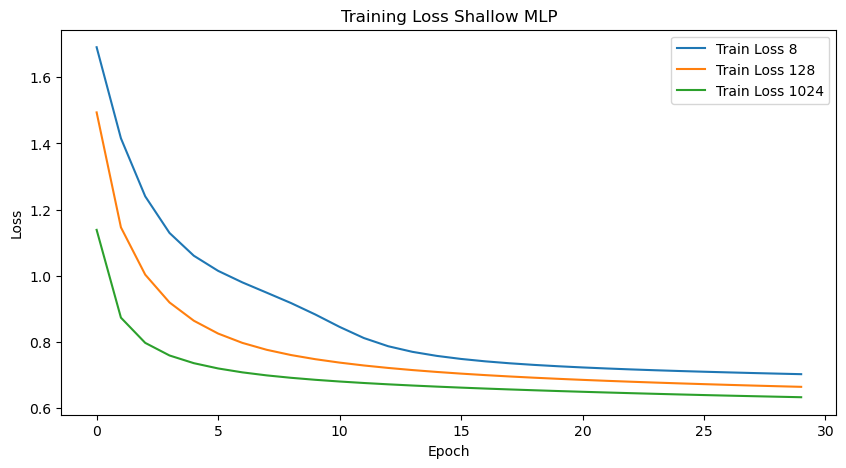

In [ ]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(metrics_task_2a["train_loss"][:-1])
plt.plot(metrics_task_2b["train_loss"][:-1])
plt.plot(metrics_task_2c["train_loss"][:-1])
plt.title("Training Loss Shallow MLP")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss 8", "Train Loss 128", "Train Loss 1024"])

#### (b) Plot Validation accuracies for the different shallow networks

Make sure you include the following for the accuracy plots too:
- Make the plot on the same figure
- Properly labelled axes
- Proper title
- Legends

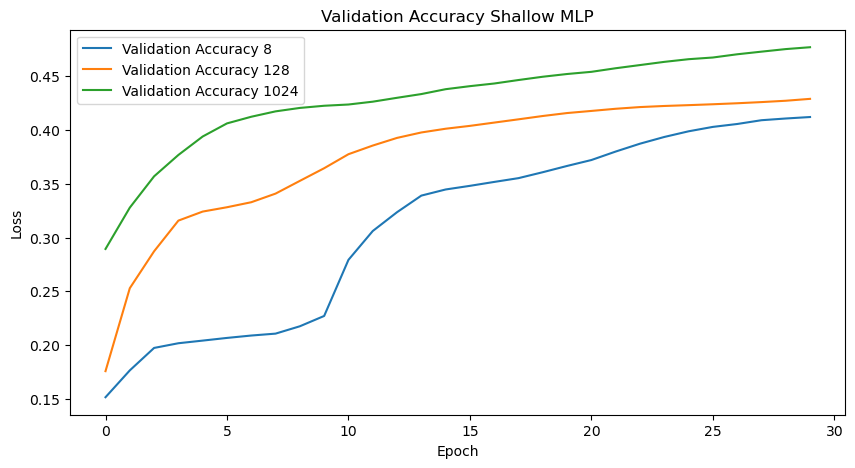

In [ ]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

plt.plot(metrics_task_2a["val_acc"][:-1])
plt.plot(metrics_task_2b["val_acc"][:-1])
plt.plot(metrics_task_2c["val_acc"][:-1])
plt.title("Validation Accuracy Shallow MLP")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(
    ["Validation Accuracy 8", "Validation Accuracy 128", "Validation Accuracy 1024"]
)

<div class="alert alert-block alert-success">

### Discussion

Please enter your answers below

**Question 1: In task 2.1(b) Why have a balanced split across classes is necessary?**

To prevent overfitting for a subset of outputs during training.

**Question 2: In the code provided below, select one model you have trained, then print out 5 predictions of test set along with groundtruth labels. How do you think the performance of the model?**

The chosen model was the model with 128 hidden neurons.
The performance is not great. From the training and test runs, the accuracy was around 43%, so getting 4/5 correct is better than expected. Having less than 50% accuracy is pretty abysmal and not very useful for any sort of automation.

**Question 3: Now please provide at least 2-3 suggestions to improve the performance of the shallow MLP, you should support your idea with reasoning or providing results of implementing the idea.**

- increase the number of hidden neurons. Solid proof that this improves performance is from the fact that the 1024 neuron model performs better.
- increase number of training epochs. From the validation loss and accuracy graphs, it looks like those values have not completely plateaued after 30 epochs, so continuing to train for longer would improve performance.


In [ ]:
# Generate predictions using predict function
inputs = test_dataset.tensors[0][:5, :]
outputs = model_shallow_b(inputs)

predictions_2b, labels_2b, inputs_2b = (
    outputs.argmax(1),
    test_dataset.tensors[1][:5],
    inputs,
)

# printout predictions along with ground truths
n = 5
labels_2b = labels_2b.cpu().numpy()

for i in range(n):
    print(f"Prediction: {label_encoder.inverse_transform([predictions_2b[i]])[0]}")
    print(f"Ground Truth: {label_encoder.inverse_transform([labels_2b[i]])[0]}")
    print("----------------------------------------------------")

Prediction: 3
Ground Truth: 6
----------------------------------------------------
Prediction: 1
Ground Truth: 1
----------------------------------------------------
Prediction: 1
Ground Truth: 1
----------------------------------------------------
Prediction: 2
Ground Truth: 2
----------------------------------------------------
Prediction: 2
Ground Truth: 2
----------------------------------------------------


<div class="alert alert-block alert-info">

# Task 3 Deep MLP <a class="anchor" id="task3"></a>

How about to build a different network for this dataset? 


<div class="alert alert-block alert-info">

## Learning Objective

This task aims to understand and implement a Deep MLP model to train neural networks on the CoverType dataset. By the end of this task, you will be able to:

1. Implement a Deep Multi-Layer Perceptron (MLP) model using PyTorch Lightning's framework.

2. Apply stochastic gradient descent (SGD) optimization method to train the MLP model on the CoverType dataset.

3. Visualize and analyze the performance of the MLP model on the given samples to understand how well it fits the data.

<div class="alert alert-block alert-info">

## 3.1 Design Deep MLP <a class="anchor" id="3_1"></a>

Design a Deep MLP:
 - You need to instantiate Deep_MLP class from LightningModule
 - Deep_MLP must take these inputs:
   1. the number of input features
   2. the number of classes
   3. A list showing number of nodes in hidden layers (e.g hidden_layers = [n_hidden1 n_hidden2 n_hidden3 n_hidden4])
   4. the learning_rate
   5. the train loader
   6. the test loader 
   7. the validation loader

 - And it should have metrics to evaluate model performance:
   1. train_accuracy
   2. test_accuracy
   3. val_accuracy
   - To define these metrics you should use Accuracy() class from pytorch-lightning

- Let's define a deep MLP with 5 hidden layers, all with **ReLU** as activation functions afterwards: 
  - fc1: Input Layer: Linear(#input features $\times$ n_hidden1) $\rightarrow$ ReLU $\rightarrow$
  - fc2: Hidden Layer: Linear(n_hidden1 $\times$ n_hidden2) $\rightarrow$ ReLU $\rightarrow$
  - fc3: Hidden Layer: Linear(n_hidden2 $\times$ n_hidden3) $\rightarrow$ ReLU $\rightarrow$
  - fc4: Hidden Layer: Linear(n_hidden3 $\times$ n_hidden4) $\rightarrow$ ReLU $\rightarrow$
  - fc5: Output Layer: Linear(n_hidden4 $\times$ classes) : Output layer maps the hidden nodes into class scores (logits)

The Class should take a list of numbers during initialisation and define the network from there.

In [ ]:
class Deep_MLP(LightningModule):
    def __init__(
        self,
        input_features,
        classes,
        hidden_layers,
        learning_rate=1e-1,
    ):
        super().__init__()
        self.save_hyperparameters()

        self.learning_rate = learning_rate
        self.loss_fun = nn.CrossEntropyLoss()

        # Define the 5 fc layers
        self.linear1 = nn.Linear(input_features, hidden_layers[0])
        self.linear2 = nn.Linear(hidden_layers[0], hidden_layers[1])
        self.linear3 = nn.Linear(hidden_layers[1], hidden_layers[2])
        self.linear4 = nn.Linear(hidden_layers[2], hidden_layers[3])
        self.linear5 = nn.Linear(hidden_layers[3], classes)

        self.train_accuracy = MulticlassAccuracy(classes)
        self.val_accuracy = MulticlassAccuracy(classes)
        self.test_accuracy = MulticlassAccuracy(classes)

    def forward(self, x):

        # Pass input through layers
        # Don't forget the activation function

        out1 = nn.functional.relu(self.linear1(x.view(x.size(0), -1)))
        out2 = nn.functional.relu(self.linear2(out1))
        out3 = nn.functional.relu(self.linear3(out2))
        out4 = nn.functional.relu(self.linear4(out3))
        out5 = self.linear5(out4)

        return out5

    def training_step(self, batch, batch_idx):
        # get the x and y values of the data point
        # pass through the network
        # Get the loss
        x, y = batch
        logits = self(x.view(x.size(0), -1))
        loss = self.loss_fun(logits, y)

        preds = logits.argmax(1)
        self.train_accuracy.update(preds, y)

        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log(
            "train_acc",
            self.train_accuracy,
            prog_bar=True,
            on_step=False,
            on_epoch=True,
        )

        return loss

    def validation_step(self, batch, batch_idx):
        # get the x and y values of the data point
        # pass through the network
        # Get the loss
        x, y = batch
        logits = self(x.view(x.size(0), -1))
        loss = self.loss_fun(logits, y)

        preds = logits.argmax(1)
        self.val_accuracy.update(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log(
            "val_acc", self.val_accuracy, prog_bar=True, on_step=False, on_epoch=True
        )

    def test_step(self, batch, batch_idx):
        # get the x and y values of the data point
        # pass through the network
        # Get the loss
        x, y = batch
        logits = self(x.view(x.size(0), -1))
        loss = self.loss_fun(logits, y)

        preds = logits.argmax(1)
        self.test_accuracy.update(preds, y)

        # Calling self.log will surface up scalars for you in TensorBoard
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_acc", self.test_accuracy, prog_bar=True)

    def predict_step(self, batch, batch_idx):
        # get the x and y values of the data point
        # pass through the network
        # Get the loss
        x, y = batch
        logits = self(x.view(x.size(0), -1))
        loss = self.loss_fun(logits, y)

        pred = logits.argmax(1)
        return pred, y, x

    def configure_optimizers(self):
        # define the SGD optimizer
        optimizer = optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

    ####################
    # DATA RELATED HOOKS
    ####################

    # def train_dataloader(self):
    #     return train_loader

    # def val_dataloader(self):
    #     return val_loader

    # def test_dataloader(self):
    #     return test_loader

<div class="alert alert-block alert-info">

## 3.2 Train and evaluate model's performance <a class="anchor" id="3_2"></a>

Now, create an instance of the model and with the following hidden layers: [128, 64, 32, 16] 


The forward propagation of model should follow this:
- Hidden layers: [n_hidden1 , n_hidden2 , n_hidden3, n_hidden4]
- Linear(#input features $\times$ n_hidden1) $\rightarrow$ ReLU $\rightarrow$ Linear(n_hidden1 $\times$ n_hidden2) $\rightarrow$ ReLU $\rightarrow$  Linear(n_hidden2 $\times$ n_hidden3) $\rightarrow$ Relu $\rightarrow$ Linear(n_hidden3 $\times$ n_hidden4)  $\rightarrow$ Relu $\rightarrow$ Linear(n_hidden4 $\times$ classes)
- Note: Make sure to set name for log file directories (eg: logs_task_3)



In [ ]:
# define the epochs and learning rate
max_epochs = 30
lr = 1e-3

# define the input features and output classes
input_features = X.shape[1]
classes = len(unique_labels)

# Initialize Deep MLP model
hidden_layers = [128, 64, 32, 16]
model_deep_a = Deep_MLP(input_features, classes, hidden_layers, lr)

# Define checkpoint callback function to save best model
checkpoint_callback_3 = ModelCheckpoint(
    monitor="val_acc",  # the value to watch out on checking the model performance
    dirpath="logs/deep",  # path to save the checkpoint
    save_top_k=1,  # save the best model
    mode="max",
    every_n_epochs=1,
)

# Train and Test Model
trainer_3 = Trainer(
    accelerator="auto",
    devices=1 if not torch.cuda.is_available() else torch.cuda.device_count(),
    max_epochs=max_epochs,
    callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback_3],
    logger=CSVLogger("logs", name="deep"),
)

# Start the training loop
trainer_3.fit(model_deep_a, train_loader, val_loader)

# Report the test performance
trainer_3.test(
    model_deep_a,
    test_loader,
    ckpt_path="best",
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/deep exists and is not empty.

  | Name           | Type               | Params | Mode 
--------------------------------------------------------------
0 | loss_fun       | CrossEntropyLoss   | 0      | train
1 | linear1        | Linear             | 7.0 K  | train
2 | linear2        | Linear             | 8.3 K  | train
3 | linear3        | Linear             | 2.1 K  | train
4 | linear4        | Linear             | 528    | train
5 | linear5        | Linear             | 119    | train
6 | train_accuracy | MulticlassAccuracy | 0      | train
7 | val_accuracy   | MulticlassAccuracy | 0      | train
8 | test_accuracy  | MulticlassAccuracy | 0      | train
--

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
Restoring states from the checkpoint path at /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/deep/epoch=29-step=40860.ckpt
Loaded model weights from the checkpoint at /home/lucas/code/ece4179-neural-networks/labs/lab-3/logs/deep/epoch=29-step=40860.ckpt
/nix/store/bxj3ic1m66k3p690vwgb0913l5l46bk9-python3-3.12.4-env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.41919392347335815
        test_loss            0.686512291431427
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.686512291431427, 'test_acc': 0.41919392347335815}]

You should expect an output like :
[{'test_loss': 0.7383896708488464, 'test_acc': 0.7318916320800781}]

<div class="alert alert-block alert-info">

## 3.3 Visualise the results for the network. <a class="anchor" id="3_3"></a>

#### (a) Plot the training loss and validation loss on the same figure. Make sure you have the axes and title properly labelled.

In [ ]:
# read logs for 3
metrics_task_3 =????
????
????

In [ ]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

????

#### (b) Plot the training accuracy and validation accuracy on the same figure. Make sure you have the axes and title properly labelled.

In [ ]:
# Plot using matplotlib
plt.figure(figsize=(10, 5))

????

<div class="alert alert-block alert-success">

### Discussion:

**Question: Did you observe a strange behaviour for the deep MLPs? If yes, what is that? Discuss what might be the source of that.**

Answer:

**Question: How does the deep MLP compare with the shallow MLP for this case?**

Answer:

**Question: Compare the Deep MLP performance trained in Task 3 with the Shallow MLPs trained in Task 2. How can we improve Deep MLP performance more? Try other network setups for number of hidden nodes or other settings in the Deep MLP and Explain why or why not the performance changed after your modifications?**

Answer:


<div class="alert alert-block alert-warning">
    
# <center> Well done! This is the end of Lab 3
    
</div>